# seaborn: heatmap

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
cars = sns.load_dataset('mpg')
cars.shape

(398, 9)

In [3]:
cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# intro visuals

## basics

In [4]:
cars.groupby('origin')['cylinders'].value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

In [5]:
"""
.unstack():  transforming it into a more readable format
 where the unique values in 'cylinders' become columns and the 'origin' values become index labels.
"""
(cars
    .groupby('origin')
    ['cylinders']
    .value_counts()
    .unstack()
)

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,63.0,3.0,4.0,NaN
japan,4.0,69.0,NaN,6.0,NaN
usa,NaN,72.0,NaN,74.0,103.0


In [6]:
# handle the missing values with 0
(cars
    .groupby('origin')
    ['cylinders']
    .value_counts()
    .unstack()
    .fillna(0)
)


cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [7]:

origin_cyl = (
    cars
    .groupby('origin')
    ['cylinders']
    .value_counts()
    .unstack()
    .fillna(0)
)


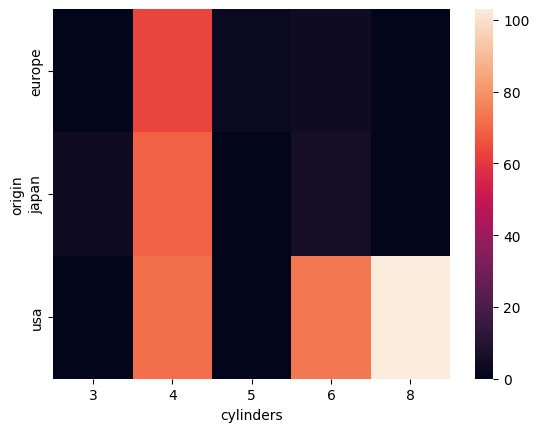

In [8]:
sns.heatmap(origin_cyl);

In [9]:
test_array = np.array([[1,2], [3,4]])
test_array

array([[1, 2],
       [3, 4]])

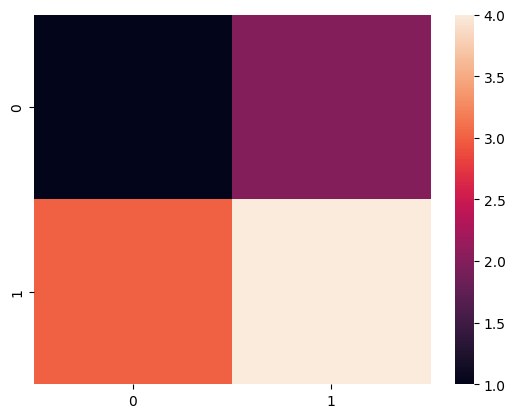

In [10]:
sns.heatmap(test_array);

## transpost

In [11]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


<Axes: xlabel='origin', ylabel='cylinders'>

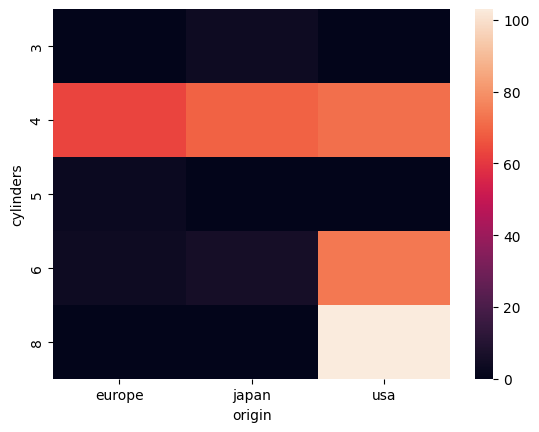

In [12]:
sns.heatmap(origin_cyl.T)

## Correlation ( .corr( ) )

In [13]:
# Select only numeric columns from the DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Calculate the correlation between numeric columns
correlation_matrix = numeric_columns.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

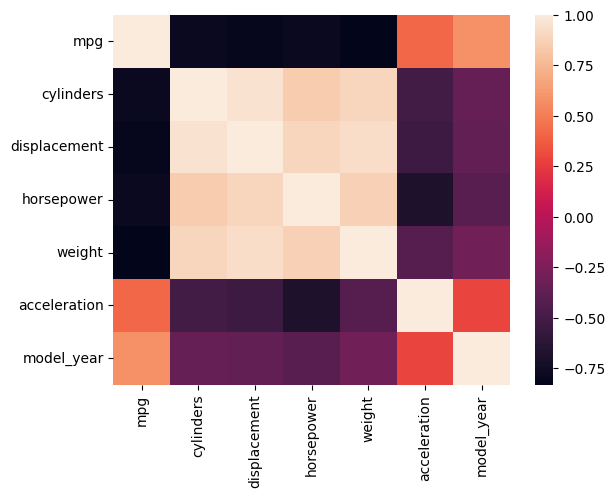

In [14]:
sns.heatmap(correlation_matrix)

## Color Palette

<Axes: >

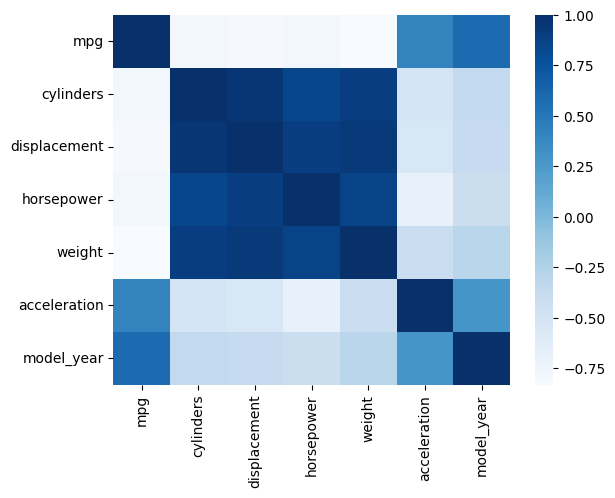

In [15]:
sns.heatmap(correlation_matrix, cmap='Blues')

### Diverging palette

<Axes: >

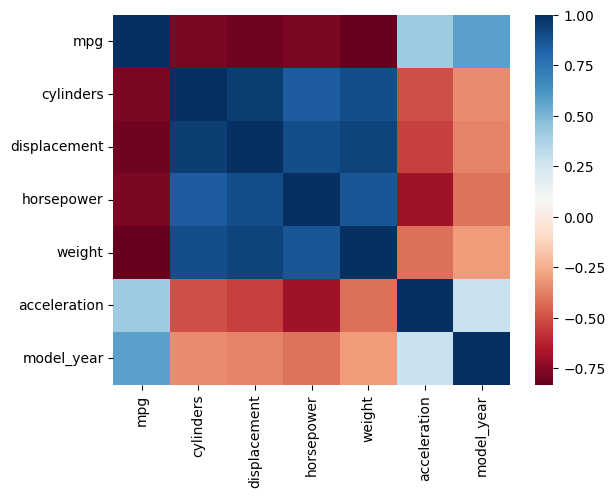

In [16]:
sns.heatmap(correlation_matrix, cmap='RdBu')

### center value

<Axes: >

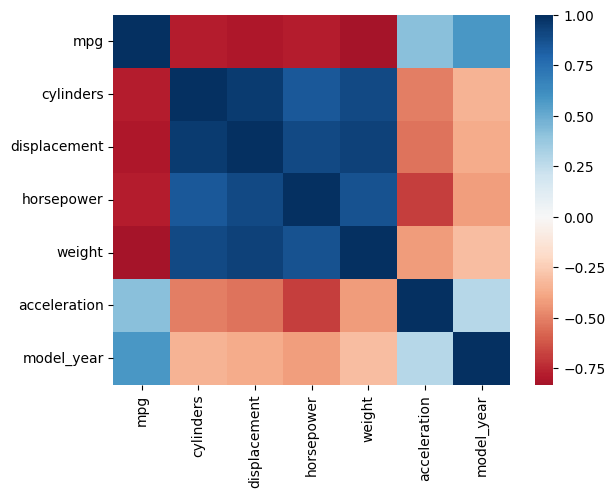

In [17]:
sns.heatmap(correlation_matrix, cmap='RdBu', center=0)

<Axes: >

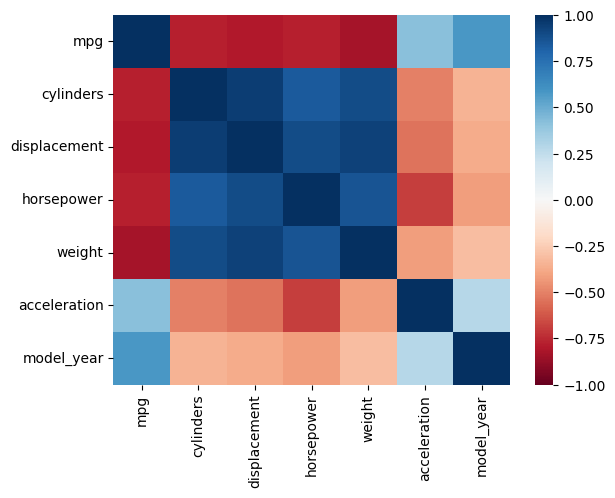

In [18]:
sns.heatmap(correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1)

## Annotation

<Axes: xlabel='cylinders', ylabel='origin'>

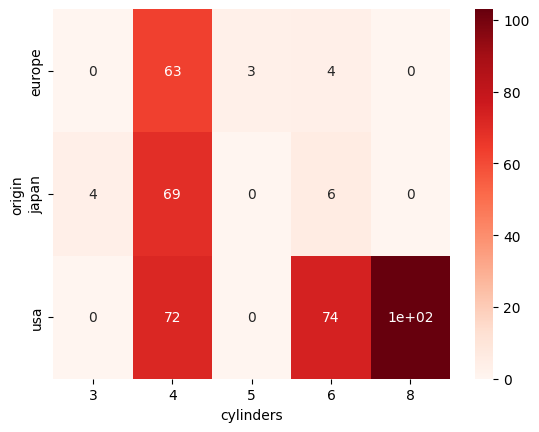

In [19]:
sns.heatmap(origin_cyl, cmap='Reds', annot=True)

<Axes: xlabel='cylinders', ylabel='origin'>

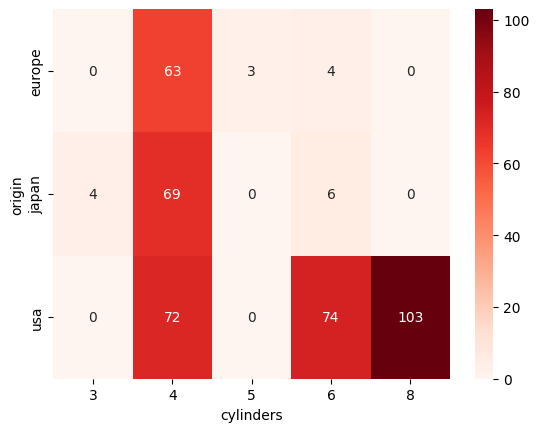

In [20]:
sns.heatmap(origin_cyl, cmap='Reds', annot=True, fmt='.0f')

<Axes: xlabel='cylinders', ylabel='origin'>

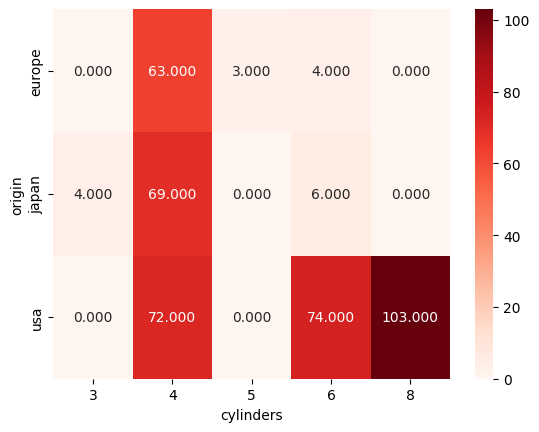

In [21]:
sns.heatmap(origin_cyl, cmap='Reds', annot=True, fmt='.3f')

<Axes: xlabel='cylinders', ylabel='origin'>

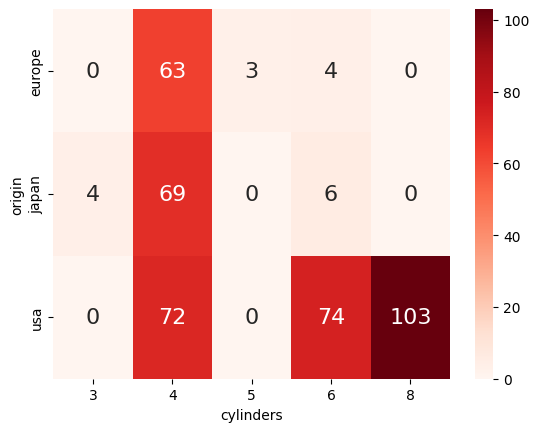

In [22]:
sns.heatmap(origin_cyl,
            cmap='Reds', 
            annot=True, 
            fmt='.0f',
            annot_kws={
                'fontsize': 16
            }
            )

<Axes: xlabel='cylinders', ylabel='origin'>

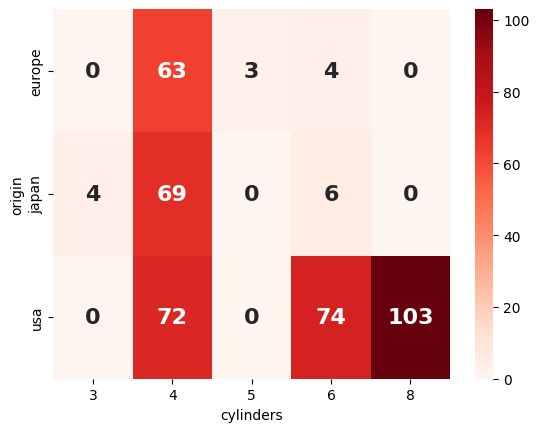

In [23]:
sns.heatmap(origin_cyl,
            cmap='Reds', 
            annot=True, 
            fmt='.0f',
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold'
            }
            )

<Axes: xlabel='cylinders', ylabel='origin'>

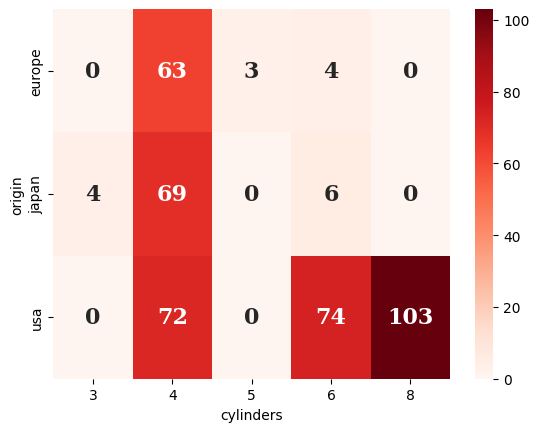

In [24]:
sns.heatmap(origin_cyl,
            cmap='Reds', 
            annot=True, 
            fmt='.0f',
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            }
            )

## Styling

## linewidth

<Axes: >

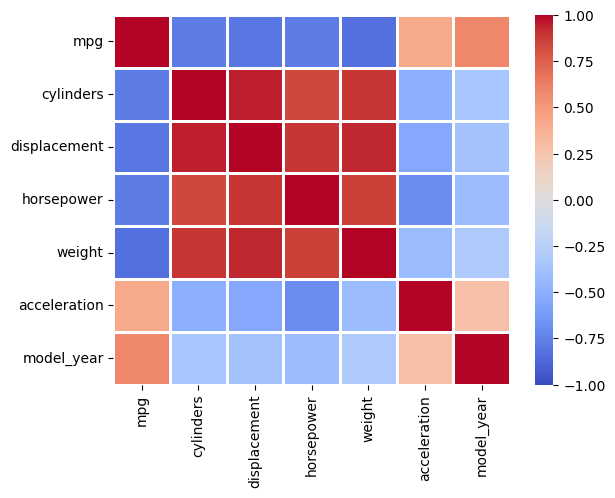

In [25]:
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidth=1
)

<Axes: >

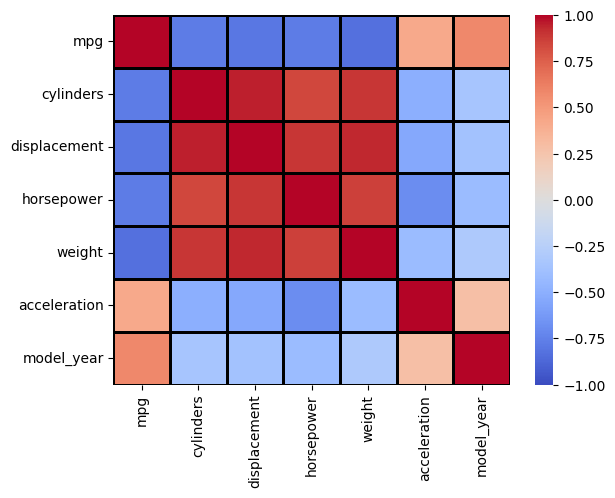

In [26]:
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidth=1,
            linecolor='black'
)

### tick labels

In [27]:
my_own_labels = [1,2,3,4,5,6,7]

<Axes: >

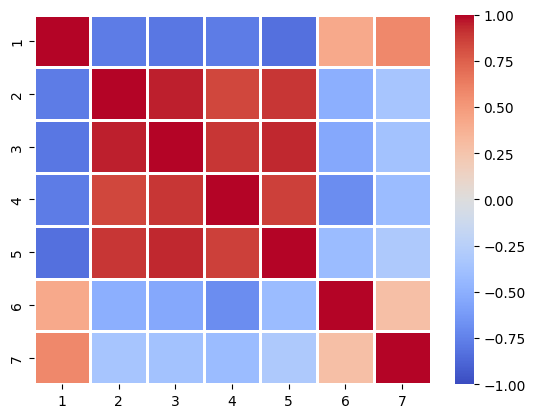

In [28]:
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidth=1,
            xticklabels=my_own_labels,
            yticklabels=my_own_labels
)

<Axes: >

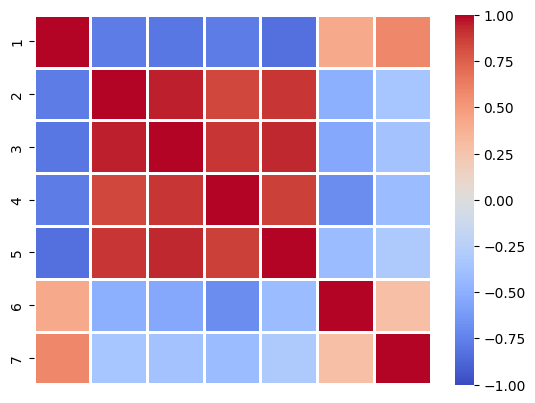

In [29]:
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidth=1,
            xticklabels=False,
            yticklabels=my_own_labels
)

### square

<Axes: >

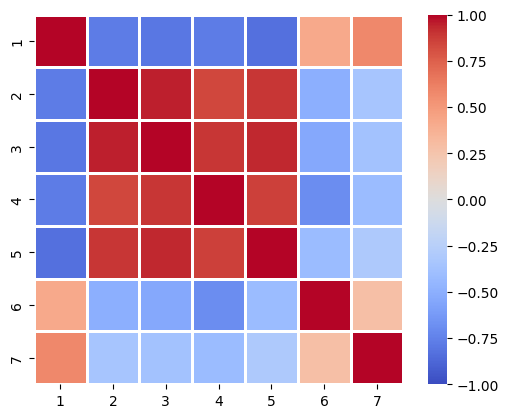

In [30]:
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidth=1,
            xticklabels=my_own_labels,
            yticklabels=my_own_labels,
            square=True
)